In [104]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [105]:
# GitLab raw CSV file URL
url = "https://gitlab.com/accredian/insaid-data/-/raw/main/DS%20Career%20Launchpad%20Data/DSCLP%202024/zomato.csv"

df = pd.read_csv(url, encoding='latin1')  # Using latin1 encoding

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [107]:
df.shape

(9551, 21)

In [108]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [109]:
#Print Columns with missing values
if df.isnull().sum().sum() != 0:
    print("Columns with missing values:")
    print(df.isnull().sum()[df.isnull().sum() != 0])

Columns with missing values:
Cuisines    9
dtype: int64


In [110]:
print(df[df['Cuisines'].isnull()]) #These are name of restaurants where cuisine value is null... and this is real data so we can use internet aswl

     Restaurant ID                 Restaurant Name  Country Code  \
84        17284105                   Cookie Shoppe           216   
87        17284211  Pearly's Famous Country Cookng           216   
94        17284158               Jimmie's Hot Dogs           216   
297       17374552                  Corkscrew Cafe           216   
328       17501439                        Dovetail           216   
346       17606621            HI Lite Bar & Lounge           216   
368       17059060                       Hillstone           216   
418       17142698                Leonard's Bakery           216   
455       17616465        Tybee Island Social Club           216   

               City                                          Address  \
84           Albany               115 N Jackson St, Albany, GA 31701   
87           Albany             814 N Slappey Blvd, Albany, GA 31701   
94           Albany               204 S Jackson St, Albany, GA 31701   
297     Gainesville            

In [111]:
''' Rather than dropping the values we are going to impute using restaurant name
    1. Cookie Shoppe : Bakery
    2. Pearly's Famous Country Cookng: American 
    3. Jimmie's Hot Dogs: Fast Food, American
    4. Corkscrew Cafe: Cafe
    5. Dovetail: American
    6. HI Lite Bar & Lounge: American
    7. Hillstone: American
    8. Leonard's Bakery: Bakery
    9. Tybee Island Social Club: Seafood
'''

" Rather than dropping the values we are going to impute using restaurant name\n    1. Cookie Shoppe : Bakery\n    2. Pearly's Famous Country Cookng: American \n    3. Jimmie's Hot Dogs: Fast Food, American\n    4. Corkscrew Cafe: Cafe\n    5. Dovetail: American\n    6. HI Lite Bar & Lounge: American\n    7. Hillstone: American\n    8. Leonard's Bakery: Bakery\n    9. Tybee Island Social Club: Seafood\n"

In [112]:
# Create a dictionary with Restaurant ID as the key and Cuisines as the value
cuisine_mapping = {
    17284105: 'Bakery',
    17284211: 'American',
    17284158: 'Fast Food, American',
    17374552: 'Cafe',
    17501439: 'American',
    17606621: 'American',
    17059060: 'American',
    17142698: 'Bakery',
    17616465: 'Seafood'
}

# Impute missing Cuisines based on the 'Restaurant ID' using the mapping
df['Cuisines'] = df.apply(lambda row: cuisine_mapping.get(row['Restaurant ID'], row['Cuisines']), axis=1)

# Check if the missing values are filled
print(df[df['Cuisines'].isnull()])

Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes]
Index: []

[0 rows x 21 columns]


In [113]:
# Print unique values in the 'Currency' column
unique_currencies = df['Currency'].unique()
print("Unique values in the 'Currency' column:")
print(unique_currencies)

Unique values in the 'Currency' column:
['Botswana Pula(P)' 'Brazilian Real(R$)' 'Dollar($)' 'Emirati Diram(AED)'
 'Indian Rupees(Rs.)' 'Indonesian Rupiah(IDR)' 'NewZealand($)'
 'Pounds(\x8c£)' 'Qatari Rial(QR)' 'Rand(R)' 'Sri Lankan Rupee(LKR)'
 'Turkish Lira(TL)']


In [114]:
#Excahnge rate as on 1st Dec 2024
currency_mapping = {

    'Dollar($)': ('USD', 1), 

    'Brazilian Real(R$)': ('BRL', 0.17),  

    'Indian Rupees(Rs.)': ('INR', 0.012),

    'Indonesian Rupiah(IDR)': ('IDR', 0.000063),  

    'NewZealand($)': ('NZD', 0.58),

    'Botswana Pula(P)': ('BWP', 0.074),  

    'Qatari Rial(QR)': ('QAR', 0.27),  

    'Rand(R)': ('ZAR', 0.053),  

    'Sri Lankan Rupee(LKR)': ('LKR', 0.0034),  

    'Turkish Lira(TL)': ('TRY', 0.029), 

    'Emirati Diram(AED)': ('AED', 0.27),  

    'Pounds(£)': ('GBP', 1.27)  

}

def convert_to_usd(row):

    currency_text = row['Currency']

    amount = row['Average Cost for two']

    currency_info = currency_mapping.get(currency_text, None)

    if currency_info is None:

        return None

    else:

        currency_code, conversion_rate = currency_info

        converted_amount = amount * conversion_rate

        return round(converted_amount, 2)

df['Average Cost for two Dollar($)'] = df.apply(convert_to_usd, axis=1)

df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Average Cost for two Dollar($)
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,81.40
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,88.80
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,296.00
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,111.00
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,111.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,2.32
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,3.05
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,4.93
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,3.48


Descriptive Statistics for 'Average Cost for Two':
count    9551.000000
mean       10.075426
std        16.807052
min         0.000000
25%         3.600000
50%         6.000000
75%        10.000000
max       500.000000
Name: Average Cost for two Dollar($), dtype: float64

IQR-based Outlier Bounds:
Lower Bound: -6.000000000000002
Upper Bound: 19.6

Number of Outliers: 1055


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


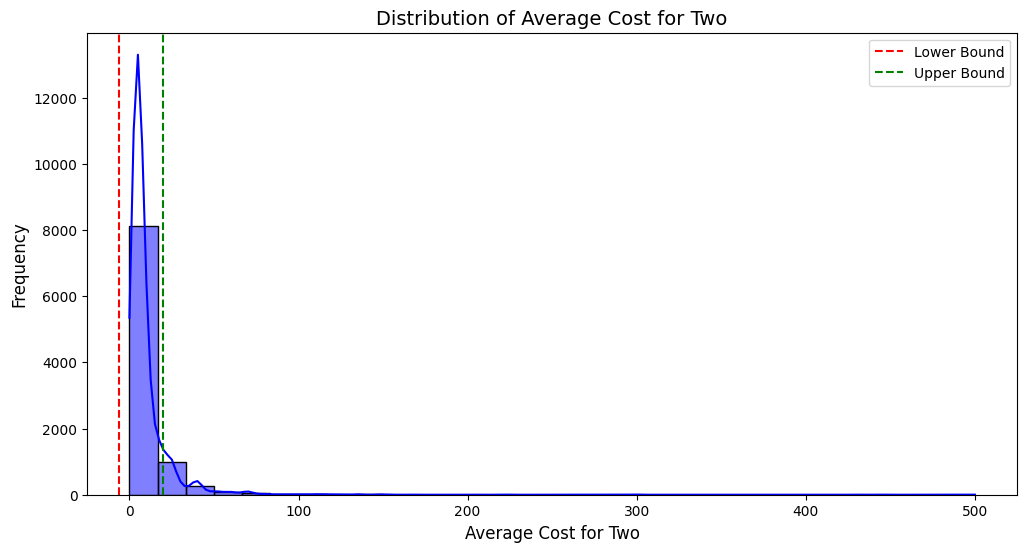

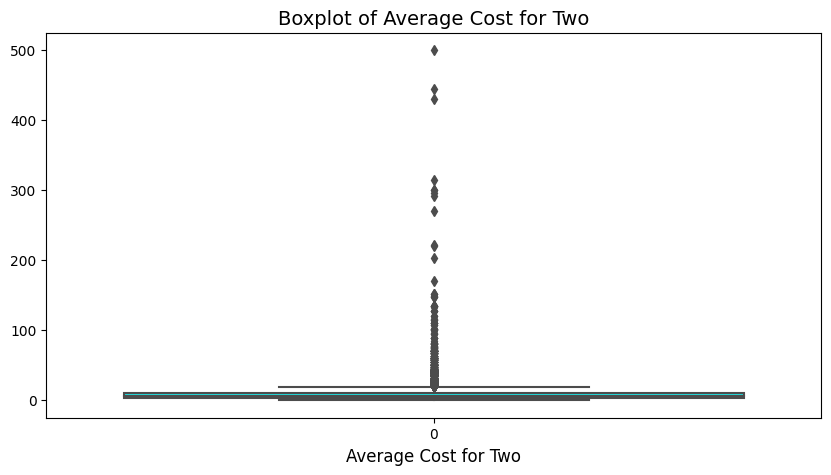

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for 'Average Cost for Two'
cost_stats = df['Average Cost for two Dollar($)'].describe()
print("Descriptive Statistics for 'Average Cost for Two':")
print(cost_stats)

# IQR Calculation for Outlier Detection
Q1 = cost_stats['25%']  # First Quartile
Q3 = cost_stats['75%']  # Third Quartile
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nIQR-based Outlier Bounds:")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Detect outliers
outliers = df[(df['Average Cost for two Dollar($)'] < lower_bound) | (df['Average Cost for two Dollar($)'] > upper_bound)]
print(f"\nNumber of Outliers: {outliers.shape[0]}")

# Visualization: Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['Average Cost for two Dollar($)'], kde=True, bins=30, color='blue')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Distribution of Average Cost for Two', fontsize=14)
plt.xlabel('Average Cost for Two', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

# Visualization: Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(df['Average Cost for two Dollar($)'], color='cyan')
plt.title('Boxplot of Average Cost for Two', fontsize=14)
plt.xlabel('Average Cost for Two', fontsize=12)
plt.show()

In [116]:
# Identify rows where 'Average Cost for two Dollar($)' is zero
zero_cost_rows = df[df['Average Cost for two Dollar($)'] == 0]
print(f"Number of rows with zero cost: {len(zero_cost_rows)}")

# Replace zeros with the median of the column
median_cost = df[df['Average Cost for two Dollar($)'] > 0]['Average Cost for two Dollar($)'].median()
df['Average Cost for two Dollar($)'] = df['Average Cost for two Dollar($)'].replace(0, median_cost)

# Verify no zeros remain
print(f"Number of rows with zero cost after fixing: {len(df[df['Average Cost for two Dollar($)'] == 0])}")

Number of rows with zero cost: 18
Number of rows with zero cost after fixing: 0


In [117]:
# Calculate IQR for outlier detection
Q1 = df['Average Cost for two Dollar($)'].quantile(0.25)  # 25th percentile
Q3 = df['Average Cost for two Dollar($)'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Calculate lower and upper bounds for outliers
lower_bound = 0
upper_bound = 100
print(f"IQR-based bounds: Lower = {lower_bound}, Upper = {upper_bound}")

# Cap the outliers to the upper and lower bounds
df['Average Cost for two Dollar($)'] = df['Average Cost for two Dollar($)'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

# Verify the changes
print("Descriptive statistics after fixing outliers:")
print(df['Average Cost for two Dollar($)'].describe())

IQR-based bounds: Lower = 0, Upper = 100
Descriptive statistics after fixing outliers:
count    9551.000000
mean        9.739688
std        12.166692
min         0.600000
25%         3.600000
50%         6.000000
75%        10.000000
max       100.000000
Name: Average Cost for two Dollar($), dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


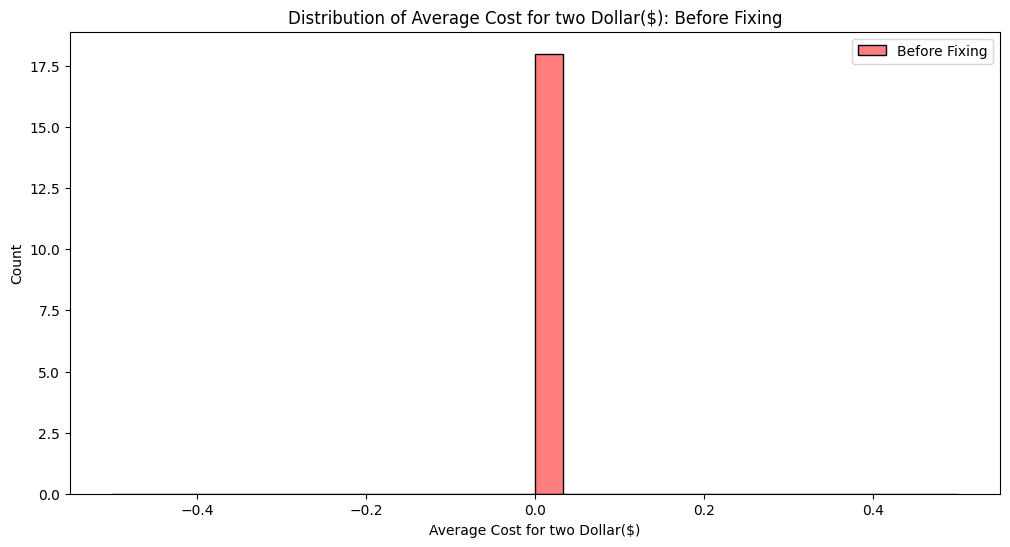

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


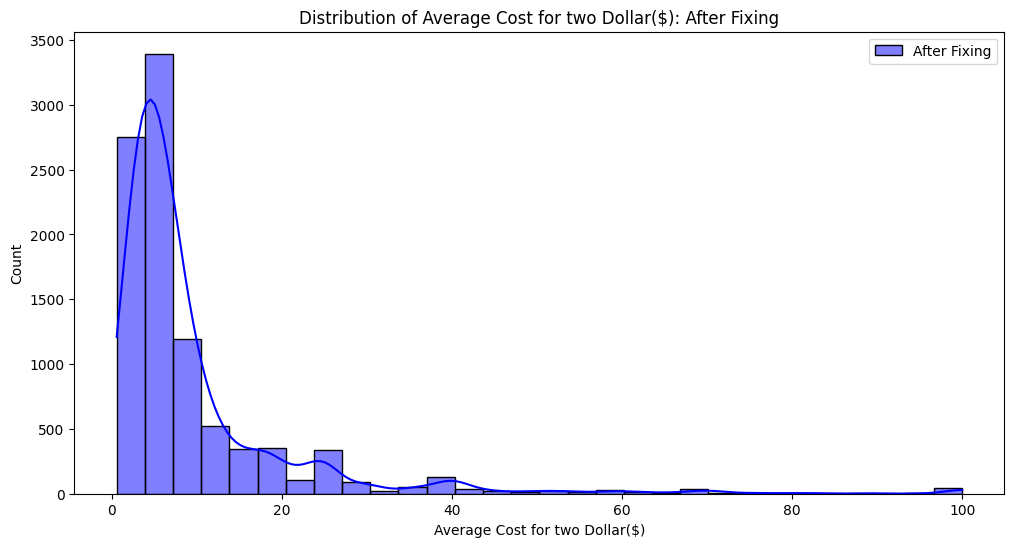

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram: Before fixing
plt.figure(figsize=(12, 6))
sns.histplot(zero_cost_rows['Average Cost for two Dollar($)'], kde=True, bins=30, color='red', label='Before Fixing')
plt.title('Distribution of Average Cost for two Dollar($): Before Fixing')
plt.xlabel('Average Cost for two Dollar($)')
plt.legend()
plt.show()

# Histogram: After fixing
plt.figure(figsize=(12, 6))
sns.histplot(df['Average Cost for two Dollar($)'], kde=True, bins=30, color='blue', label='After Fixing')
plt.title('Distribution of Average Cost for two Dollar($): After Fixing')
plt.xlabel('Average Cost for two Dollar($)')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


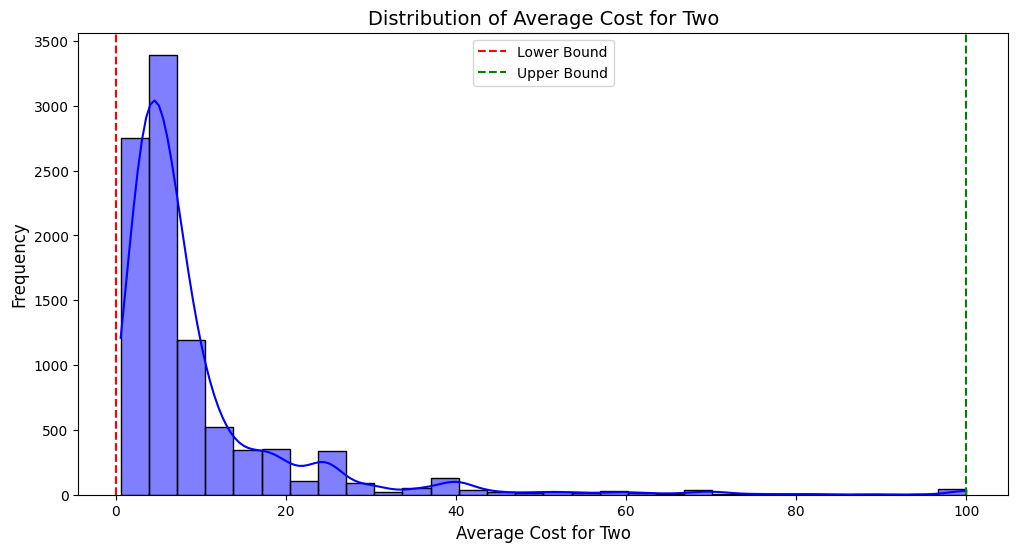

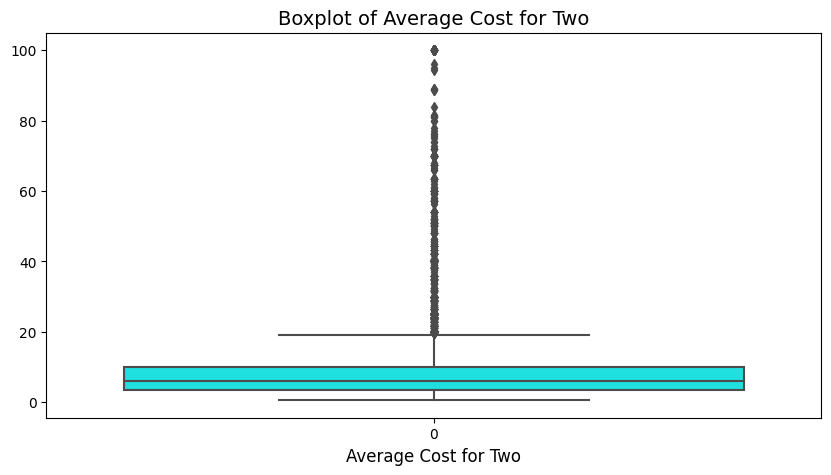

In [119]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Average Cost for two Dollar($)'], kde=True, bins=30, color='blue')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Distribution of Average Cost for Two', fontsize=14)
plt.xlabel('Average Cost for Two', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

# Visualization: Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(df['Average Cost for two Dollar($)'], color='cyan')
plt.title('Boxplot of Average Cost for Two', fontsize=14)
plt.xlabel('Average Cost for Two', fontsize=12)
plt.show()

## 1. Cuisine & Rating by Price Segment

## Q. What are the top 5 cuisines offered by highly rated restaurants (with ratings above 4) within each price range

In [120]:
import pandas as pd

# Step 1: Filter restaurants with ratings above 4
highly_rated_df = df[df['Aggregate rating'] > 4]

# Step 2: Group by Price Range and Cuisine, and count occurrences
cuisine_by_price = highly_rated_df.groupby(['Price range', 'Cuisines']).size().reset_index(name='count')

# Step 3: Sort by Price Range and Count to get the top cuisines
cuisine_by_price_sorted = cuisine_by_price.sort_values(['Price range', 'count'], ascending=[True, False])

# Step 4: Get the top 5 cuisines for each price range
top_5_cuisines_by_price = cuisine_by_price_sorted.groupby('Price range').head(5)

# Display the result
print(top_5_cuisines_by_price)

     Price range               Cuisines  count
75             1                Mexican      8
58             1              Fast Food      7
64             1              Ice Cream      5
94             1            Street Food      5
48             1               Desserts      4
156            2                   Cafe     13
133            2       Bakery, Desserts     10
270            2  North Indian, Mughlai     10
221            2              Fast Food      6
228            2                 Indian      6
354            3                   Cafe     11
538            3           North Indian     11
544            3  North Indian, Chinese      9
486            3                Italian      8
577            3  North Indian, Mughlai      8
707            4                Italian     11
700            4                 Indian      7
623            4               American      5
735            4          Modern Indian      5
738            4           North Indian      5


/tmp/ipykernel_30/2451563048.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_5_cuisines_by_price, x='Cuisines', y='count', hue='Price range', ci=None, palette='Set2')


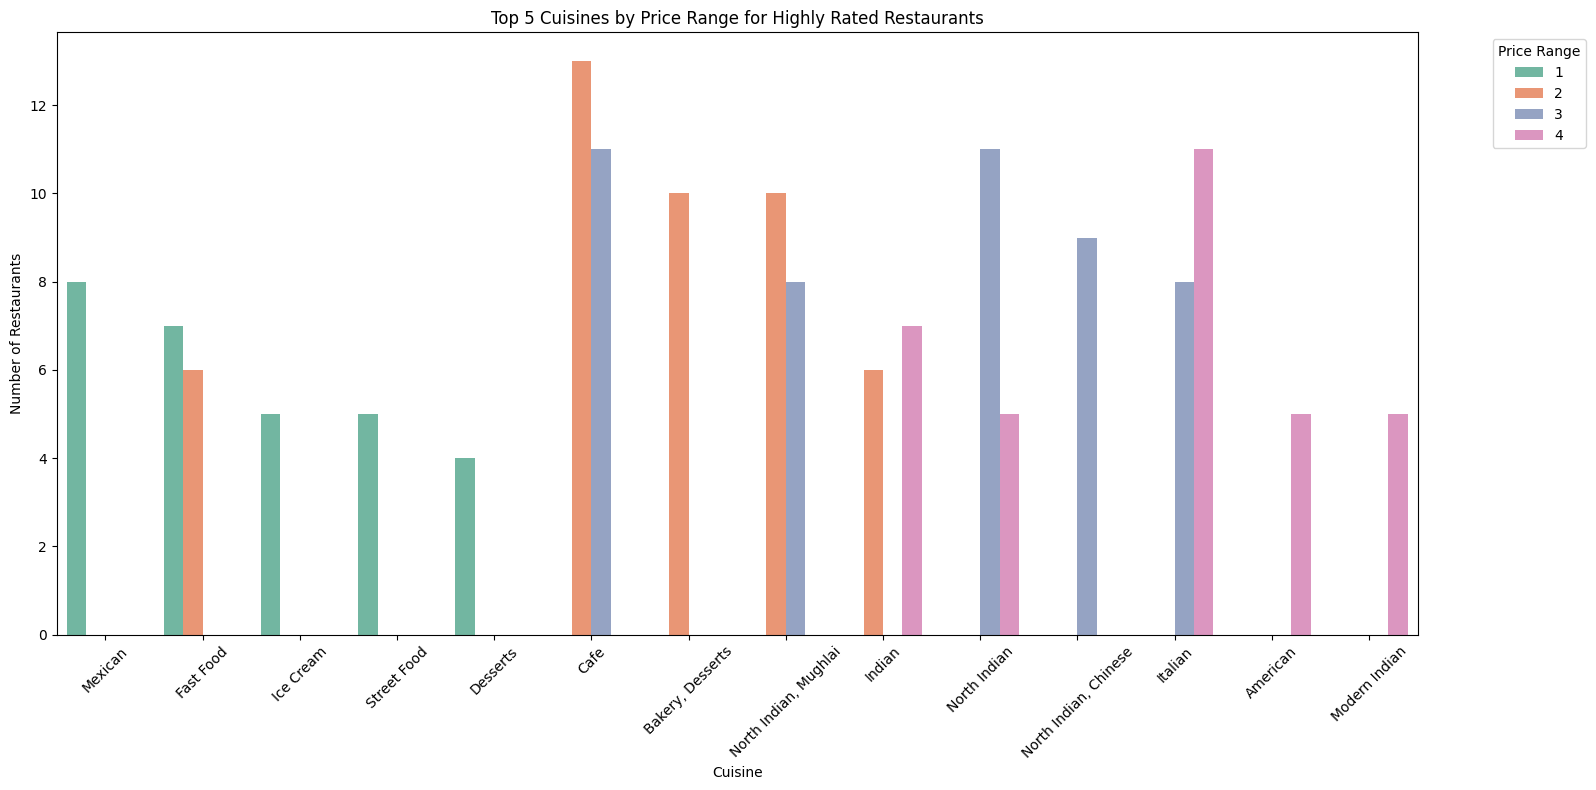

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped Bar Plot for Top Cuisines across Price Ranges
plt.figure(figsize=(16, 8))
sns.barplot(data=top_5_cuisines_by_price, x='Cuisines', y='count', hue='Price range', ci=None, palette='Set2')

# Titles and Labels
plt.title('Top 5 Cuisines by Price Range for Highly Rated Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

## Q. How do these preferences vary across top 5 different cities by the number of highly rated restaurants ?

In [122]:
#TOP 5 CITIES based solely on number of restaurants
city_counts = df['City'].value_counts()

# Get the top N cities by count (top 5 cities)
top_cities = city_counts.head(5)

# Print the result
print(top_cities)


City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64


In [123]:
#TOP 5 CITIES based on number of highly rated restaurants (rating>4)
highly_rated = df[df['Aggregate rating'] > 4]

# Group by city and count the number of highly rated restaurants
city_counts = highly_rated['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Number of Highly Rated Restaurants']

# Get the top 5 cities by number of highly rated restaurants
top_5_cities = city_counts.head()
print(top_5_cities)

        City  Number of Highly Rated Restaurants
0  New Delhi                                 239
1    Gurgaon                                  62
2      Noida                                  20
3     London                                  19
4    Orlando                                  19


In [124]:
# Filter the data to include only restaurants in the top 5 cities
top_cities_data = highly_rated[highly_rated['City'].isin(top_5_cities['City'])]

# Group by City, Cuisines, and Price range to count the number of restaurants offering each cuisine-price combination
city_cuisine_price_counts = top_cities_data.groupby(['City', 'Cuisines', 'Price range']).size().reset_index(name='count')

# Sort by City and count in descending order to find the top 5 cuisines for each city
city_cuisine_price_counts_sorted = city_cuisine_price_counts.sort_values(by=['City', 'count'], ascending=[True, False])

# Get the top 5 most eaten cuisines for each city, including their price range
top_5_cuisines_price_each_city = city_cuisine_price_counts_sorted.groupby('City').head(5)

# Check the result
print(top_5_cuisines_price_each_city)


          City                              Cuisines  Price range  count
56     Gurgaon                 North Indian, Mughlai            2      2
57     Gurgaon                 North Indian, Mughlai            3      2
0      Gurgaon         American, Continental, Burger            3      1
1      Gurgaon            American, Italian, Chinese            3      1
2      Gurgaon                        Asian, Burmese            3      1
64      London                      Chinese, Dim Sum            4      2
71      London                               Italian            3      2
60      London                      American, Burger            2      1
61      London                      American, Burger            3      1
62      London                               British            3      1
92   New Delhi                      Bakery, Desserts            2      7
200  New Delhi                          North Indian            3      7
176  New Delhi                             Ice Crea

In [125]:
# visualisation, Observations to be done

## 2. Online Delivery Influence on Low-Cost High-Rating Restaurants

### Q. Among low-cost restaurants (price range = 1), how many offer online delivery and have a rating above 4.0? How does this compare to those that don’t offer delivery in terms of customer engagement (votes)?

In [126]:
# Filter the dataset for low-cost restaurants with price range 1
low_cost_restaurants = df[df['Price range'] == 1]

# Further filter for those offering online delivery and with a rating above 4.0
filtered_restaurants = low_cost_restaurants[(low_cost_restaurants['Has Online delivery'] == 'Yes') &
                                            (low_cost_restaurants['Aggregate rating'] > 4.0)]

# Count the number of such restaurants
num_filtered_restaurants = filtered_restaurants.shape[0]

# Output the result
print(f'Number of low-cost restaurants offering online delivery and with a rating above 4.0: {num_filtered_restaurants}')

Number of low-cost restaurants offering online delivery and with a rating above 4.0: 29


In [127]:
low_cost_high_rating = df[(df['Price range'] == 1) & (df['Aggregate rating'] > 4.0)]

# Group by online delivery
online_delivery_stats = low_cost_high_rating.groupby('Has Online delivery').agg(
    num_restaurants=('Restaurant ID', 'count'),
    avg_votes=('Votes', 'mean')
).reset_index()

# Display results
print(online_delivery_stats)

  Has Online delivery  num_restaurants   avg_votes
0                  No              113  489.000000
1                 Yes               29  380.068966


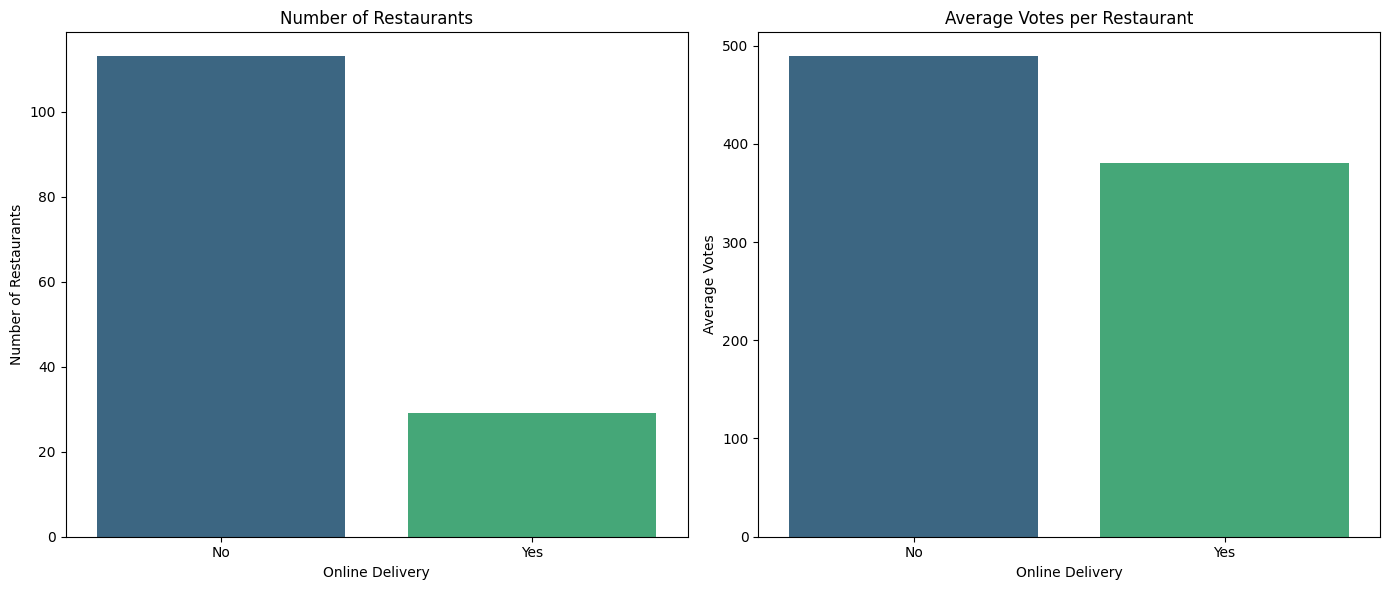

In [128]:
low_cost_high_rating = df[(df['Price range'] == 1) & (df['Aggregate rating'] > 4.0)]

# Group by online delivery
online_delivery_stats = low_cost_high_rating.groupby('Has Online delivery').agg(
    num_restaurants=('Restaurant ID', 'count'),
    avg_votes=('Votes', 'mean')
).reset_index()

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for number of restaurants
sns.barplot(
    x='Has Online delivery', 
    y='num_restaurants', 
    data=online_delivery_stats, 
    ax=axes[0], 
    palette='viridis'
)
axes[0].set_title('Number of Restaurants')
axes[0].set_ylabel('Number of Restaurants')
axes[0].set_xlabel('Online Delivery')

# Bar plot for average votes
sns.barplot(
    x='Has Online delivery', 
    y='avg_votes', 
    data=online_delivery_stats, 
    ax=axes[1], 
    palette='viridis'
)
axes[1].set_title('Average Votes per Restaurant')
axes[1].set_ylabel('Average Votes')
axes[1].set_xlabel('Online Delivery')

# Adjust layout
plt.tight_layout()
plt.show()

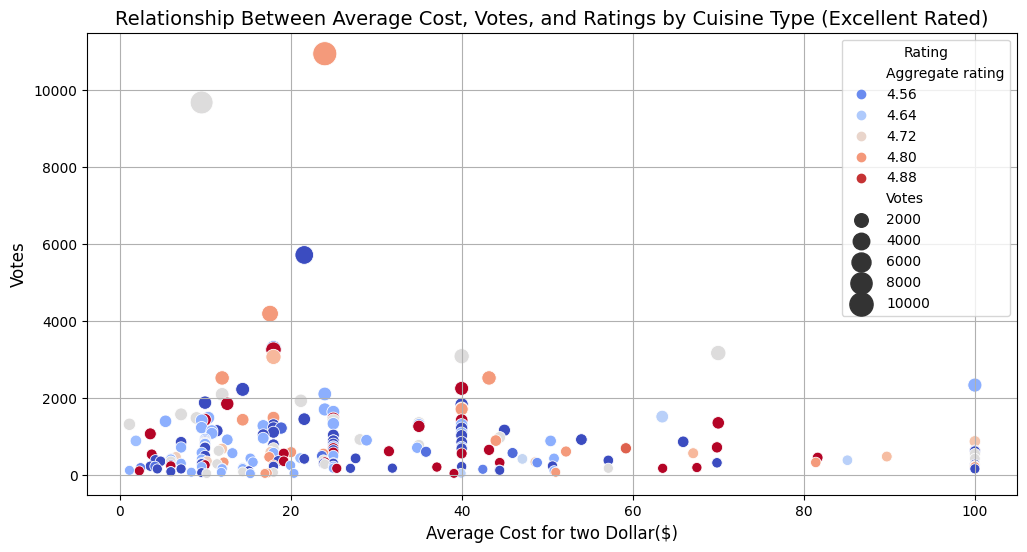

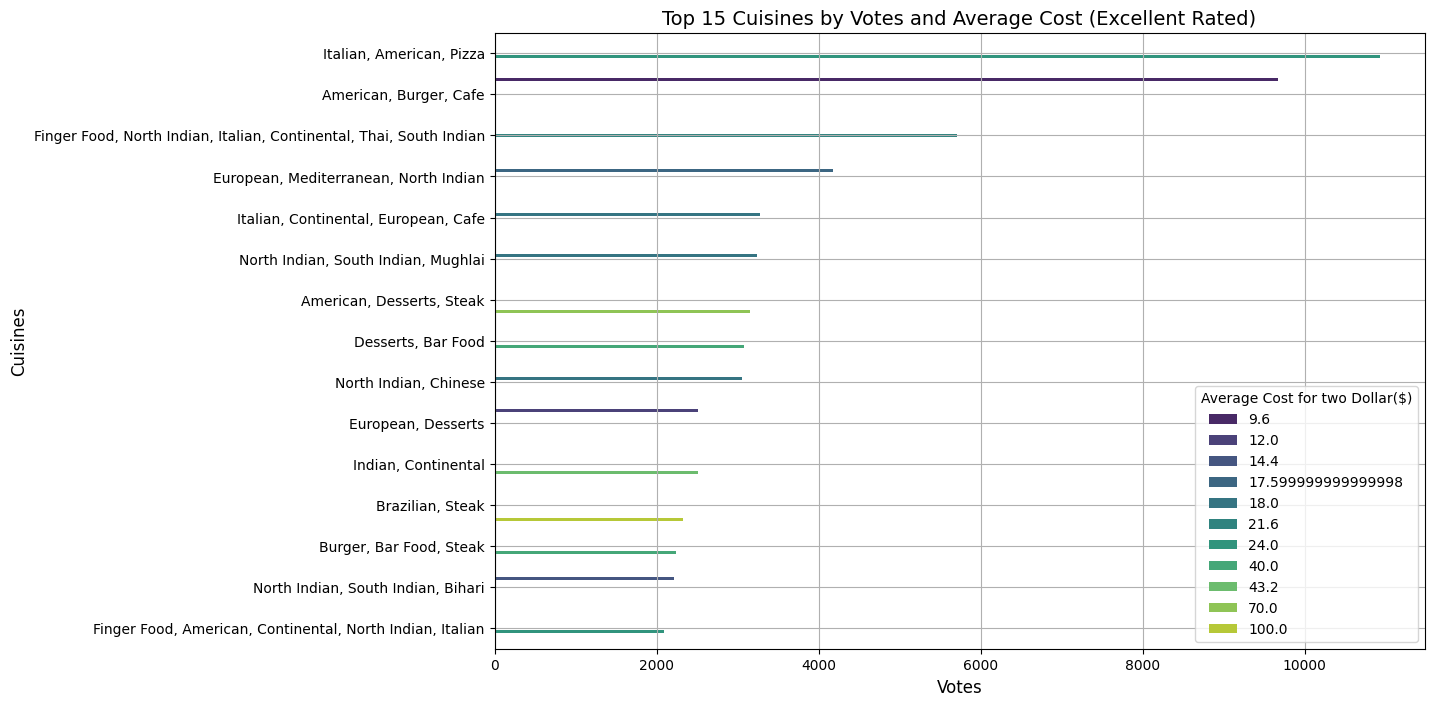

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for "Excellent" rated restaurants
excellent_restaurants = df[df['Rating text'] == 'Excellent']

# Group by Cuisine Type
cuisine_analysis = excellent_restaurants.groupby('Cuisines').agg({
    'Average Cost for two Dollar($)': 'mean',
    'Votes': 'mean',
    'Aggregate rating': 'mean'
}).reset_index()

# Sort by Votes for visualization clarity
cuisine_analysis = cuisine_analysis.sort_values(by='Votes', ascending=False)

# Scatter Plot: Average Cost vs. Votes with Rating as color
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=cuisine_analysis,
    x='Average Cost for two Dollar($)',
    y='Votes',
    hue='Aggregate rating',
    palette='coolwarm',
    size='Votes',
    sizes=(50, 300),
    legend='brief'
)
plt.title("Relationship Between Average Cost, Votes, and Ratings by Cuisine Type (Excellent Rated)", fontsize=14)
plt.xlabel("Average Cost for two Dollar($)", fontsize=12)
plt.ylabel("Votes", fontsize=12)
plt.legend(title="Rating")
plt.grid(True)
plt.show()

# Bar Plot: Average Cost vs Votes by Cuisine
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(
    data=cuisine_analysis.head(15),  # Focus on top cuisines by votes
    x='Votes',
    y='Cuisines',
    hue='Average Cost for two Dollar($)',
    palette='viridis'
)
plt.title("Top 15 Cuisines by Votes and Average Cost (Excellent Rated)", fontsize=14)
plt.xlabel("Votes", fontsize=12)
plt.ylabel("Cuisines", fontsize=12)
plt.legend(title="Average Cost for two Dollar($)")
plt.grid(True)
plt.show()